In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
df = pd.read_csv("../data/house_price_cleaned.csv")

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,house_age,total_size,was_renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,70,9252,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,104,12700,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,59,13877,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,62,10030,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,49,12440,1


In [4]:
X = df.drop("price", axis=1)

y = df["price"]

print(X.shape, y.shape)

(4600, 20) (4600,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (3680, 20)
Testing size: (920, 20)


In [6]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("Linear Regression trained")

ValueError: could not convert string to float: '2014-06-04 00:00:00'

In [7]:
# Load dataset
df = pd.read_csv("../data/house_price_cleaned.csv")

# Show columns
print(df.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'house_age', 'total_size', 'was_renovated'],
      dtype='object')


In [8]:
# Remove non-numeric columns that ML cannot use

columns_to_drop = []

if 'date' in df.columns:
    columns_to_drop.append('date')

if 'id' in df.columns:
    columns_to_drop.append('id')

df.drop(columns=columns_to_drop, inplace=True)

print("Dropped columns:", columns_to_drop)

df.head()

Dropped columns: ['date']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,house_age,total_size,was_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,70,9252,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,104,12700,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,59,13877,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,62,10030,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,49,12440,1


In [9]:
X = df.drop("price", axis=1)

y = df["price"]

print(X.shape, y.shape)

(4600, 19) (4600,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

    X, y,
    test_size=0.2,
    random_state=42

)

In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("Linear Regression trained successfully")

ValueError: could not convert string to float: '18630 NE 202nd St'

In [12]:
print(df.dtypes)

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
house_age          int64
total_size         int64
was_renovated      int64
dtype: object


In [13]:
df = df.select_dtypes(include=['int64', 'float64'])

print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'house_age', 'total_size', 'was_renovated'],
      dtype='object')


In [14]:
X = df.drop("price", axis=1)

y = df["price"]

print(X.shape, y.shape)

(4600, 15) (4600,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

    X, y,
    test_size=0.2,
    random_state=42

)

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("Linear Regression trained successfully")

Linear Regression trained successfully


In [17]:
X.dtypes

bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
house_age          int64
total_size         int64
was_renovated      int64
dtype: object

In [18]:
lr_pred = lr_model.predict(X_test)

print("Predictions completed")

Predictions completed


In [19]:
from sklearn.metrics import mean_squared_error

lr_mse = mean_squared_error(y_test, lr_pred)

print("Linear Regression Mean Squared Error:", lr_mse)

Linear Regression Mean Squared Error: 986925083215.4436


In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree trained successfully")

Decision Tree trained successfully


In [21]:
dt_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)

print("Decision Tree Mean Squared Error:", dt_mse)

Decision Tree Mean Squared Error: 1032662970614.8694


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Random Forest trained successfully")

Random Forest trained successfully


In [23]:
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest Mean Squared Error:", rf_mse)

Random Forest Mean Squared Error: 989967761482.7943


In [24]:
results = pd.DataFrame({

    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest"
    ],

    "Mean Squared Error": [
        lr_mse,
        dt_mse,
        rf_mse
    ]

})

results

,Model,Mean Squared Error
0,Linear Regression,9.869251e+11
1,Decision Tree,1.032663e+12
2,Random Forest,9.899678e+11


In [25]:
importance = rf_model.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({

    "Feature": feature_names,
    "Importance": importance

})

importance_df = importance_df.sort_values(
    by="Importance",
    ascending=False
)

importance_df

,Feature,Importance
2,sqft_living,0.537757
8,sqft_above,0.066608
3,sqft_lot,0.051330
10,yr_built,0.050072
12,house_age,0.048873
9,sqft_basement,0.047704
13,total_size,0.044720
1,bathrooms,0.044688
6,view,0.031700
0,bedrooms,0.019227


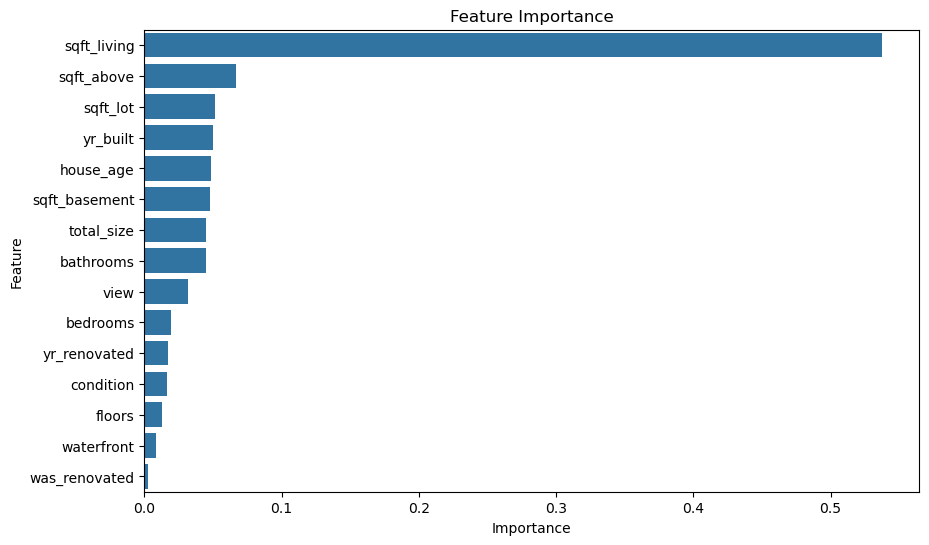

In [26]:
plt.figure(figsize=(10,6))

sns.barplot(
    x="Importance",
    y="Feature",
    data=importance_df
)

plt.title("Feature Importance")

plt.savefig("../outputs/feature_importance.png")

plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {

    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]

}

grid = GridSearchCV(

    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error'

)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [30]:
import pickle

with open("../../Task 3 - Deployment/model/house_price_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved successfully")

FileNotFoundError: [Errno 2] No such file or directory: '../../Task 3 - Deployment/model/house_price_model.pkl'

In [31]:
import pickle
import os

os.makedirs("../../ Deployment/model", exist_ok=True)

# Save model
model_path = "../../Deployment/model/house_price_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved successfully at:", model_path)

Model saved successfully at: ../../Deployment/model/house_price_model.pkl


In [32]:
print(X.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'house_age', 'total_size', 'was_renovated'],
      dtype='object')
